#### Word vectors

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /Users/jason/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [6]:
# get tokens tokenize this is done already in the data we downloaded
gberg_tokens = gutenberg.sents()
gberg_tokens[0]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']

In [20]:
# make some word vectors, this is slow
model = Word2Vec(
    sentences=gberg_tokens, 
    size=64, 
    sg=1, 
    window=10,
    min_count=5, 
    seed=42,
    workers=2
)

In [33]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])

/usr/local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sister', 0.7949286103248596),
 ('mother', 0.7733278870582581),
 ('wife', 0.7537202835083008),
 ('husband', 0.7510678768157959),
 ('Sarah', 0.7269628047943115),
 ('daughter', 0.725043773651123),
 ('Sarai', 0.7169628143310547),
 ('brother', 0.7116388082504272),
 ('daughters', 0.7053837776184082),
 ('Amnon', 0.6939828395843506)]

In [35]:
# use t-SNE to help visualize
# this is slow so only run once

# n words in our model
x = model[model.wv.vocab]

# tsne
tsne = TSNE(n_components=2, n_iter=1000)

# 2d
x_2d = tsne.fit_transform(x)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [36]:
# 2d output to dataframe
df = pd.DataFrame(x_2d, columns=['x', 'y'])
df['tokens'] = model.wv.vocab.keys()

In [39]:
df.head()

,x,y,tokens
0,24.105185,51.641674,[
1,63.262066,1.795535,Emma
2,27.329954,-29.253771,by
3,63.361385,-0.329941,Jane
4,24.098684,51.583317,]


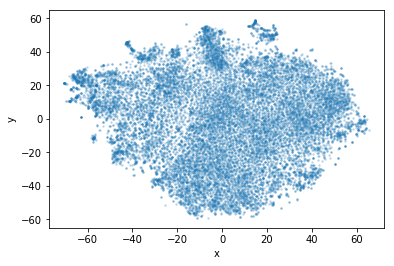

In [47]:
_ = df.plot.scatter('x', 'y', marker='.', alpha=0.2, s=10)

In [48]:
output_notebook()

Loading BokehJS ...

In [50]:
subset_df = df.sample(n=5000)

In [53]:
# plot word vectors on 2d space. Nothing too crazy but neat to look at.
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.tokens)
show(p)